# Land Registry Latest

In [2]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
%matplotlib inline

In [91]:
sys.executable

'/Users/eric/e-prop/et/venv/bin/python3.6'

In [4]:
 dict_data_types = {
        'transaction_id': 'string',
        'price': 'long',
        'date_of_transfer': 'timestamp',
        'postcode': 'string',
        'property_type': 'string',
        'old_or_new': 'string',
        'duration': 'string',
        'paon': 'string',
        'saon': 'string',
        'street': 'string',
        'locality': 'string',
        'town_city': 'string',
        'district': 'string',
        'county': 'string',
        'ppd_category': 'string',
        'record_status': 'string'
    }
column_headers = list(dict_data_types.keys())
column_headers

['transaction_id',
 'price',
 'date_of_transfer',
 'postcode',
 'property_type',
 'old_or_new',
 'duration',
 'paon',
 'saon',
 'street',
 'locality',
 'town_city',
 'district',
 'county',
 'ppd_category',
 'record_status']

### Read in data and review

In [5]:
data = pd.read_csv('latest.csv', names=column_headers)

In [6]:
data['date_of_transfer'] = pd.to_datetime(data['date_of_transfer'])

In [7]:
data.sample(4)

,transaction_id,price,date_of_transfer,postcode,property_type,old_or_new,duration,paon,saon,street,locality,town_city,district,county,ppd_category,record_status
49324,{6DA08449-F9C9-30F2-E053-6B04A8C05F3B},85000,2018-04-30,DN14 6HJ,T,N,F,48,NaN,COLONELS WALK,NaN,GOOLE,EAST RIDING OF YORKSHIRE,EAST RIDING OF YORKSHIRE,A,A
58427,{6DA0844A-121A-30F2-E053-6B04A8C05F3B},135000,2018-05-01,NG31 7WJ,T,N,F,10,NaN,WILKS ROAD,NaN,GRANTHAM,SOUTH KESTEVEN,LINCOLNSHIRE,B,A
20761,{6DA0844A-848D-30F2-E053-6B04A8C05F3B},138000,2018-04-24,B23 6EE,T,N,F,34,NaN,SOUTH ROAD,ERDINGTON,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,A,A
24489,{6DA0844A-8306-30F2-E053-6B04A8C05F3B},195000,2018-03-02,CV37 6AU,F,N,L,"MERCERS CROFT, 29A",FLAT 2,HIGH STREET,NaN,STRATFORD-UPON-AVON,STRATFORD-ON-AVON,WARWICKSHIRE,A,A


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90858 entries, 0 to 90857
Data columns (total 16 columns):
transaction_id      90858 non-null object
price               90858 non-null int64
date_of_transfer    90858 non-null datetime64[ns]
postcode            90196 non-null object
property_type       90858 non-null object
old_or_new          90858 non-null object
duration            90858 non-null object
paon                90858 non-null object
saon                14106 non-null object
street              89016 non-null object
locality            33737 non-null object
town_city           90858 non-null object
district            90858 non-null object
county              90858 non-null object
ppd_category        90858 non-null object
record_status       90858 non-null object
dtypes: datetime64[ns](1), int64(1), object(14)
memory usage: 11.1+ MB


### Date Range

In [9]:
# Date range of records
data['date_of_transfer'].min(), data['date_of_transfer'].max()

(Timestamp('1995-01-06 00:00:00'), Timestamp('2018-05-30 00:00:00'))

In [10]:
# Test the yearly sum of price paid data
yr = 1995
yr_data = data[data['date_of_transfer'].dt.year == yr]
print(f"Year {yr} total: £{yr_data['price'].sum()}")
yr_data.head()

Year 1995 total: £5190080


,transaction_id,price,date_of_transfer,postcode,property_type,old_or_new,duration,paon,saon,street,locality,town_city,district,county,ppd_category,record_status
2936,{6DA08449-F093-30F2-E053-6B04A8C05F3B},50000,1995-06-01,WD19 5EG,T,N,F,7,NaN,GIBBS COUCH,NaN,WATFORD,WATFORD,HERTFORDSHIRE,A,A
2937,{6DA08449-991F-30F2-E053-6B04A8C05F3B},92500,1995-01-11,RG17 8QQ,D,N,F,WOOD VIEW,NaN,THE PARK,LAMBOURN,HUNGERFORD,WEST BERKSHIRE,WEST BERKSHIRE,A,A
2938,{6DA08449-998F-30F2-E053-6B04A8C05F3B},38500,1995-08-25,RG40 1XU,F,Y,L,66,NaN,ROSE STREET,NaN,WOKINGHAM,WOKINGHAM,WOKINGHAM,A,A
2939,{6DA08449-DA33-30F2-E053-6B04A8C05F3B},175000,1995-05-01,CM9 6NN,D,N,F,BRIAR COTTAGE,NaN,ROUNDBUSH ROAD,MUNDON,MALDON,MALDON,ESSEX,A,A
2940,{6DA0844A-102A-30F2-E053-6B04A8C05F3B},185000,1995-03-17,PE9 4UD,D,Y,F,1,NaN,THE CHARTERS,UFFINGTON,STAMFORD,SOUTH KESTEVEN,LINCOLNSHIRE,A,A


In [11]:
# Group price paid by year
f = {'price': ['sum', 'count']}
transfer_by_yr = data[['price']].groupby(data['date_of_transfer'].dt.year).agg(f)
transfer_by_yr

price       
                          sum  count
date_of_transfer                    
1995                  5190080     63
1996                  8753398     83
1997                  6844045     70
1998                 10146360     88
1999                 10299688     81
2000                 12300706     75
2001                 25476179    150
2002                 20161913    121
2003                 19900418    112
2004                 19701549     97
2005                 23202635    107
2006                 33794376    132
2007                 30406579    136
2008                 18735015     78
2009                  9601000     45
2010                 17489791     59
2011                 70887125     56
2012                 16991495     56
2013                 41063673    114
2014                 84650392    141
2015                223868712    314
2016                391336194    735
2017               2970194171   7616
2018              28609568401  80329

Text(0.5,1,'Total spent by year')

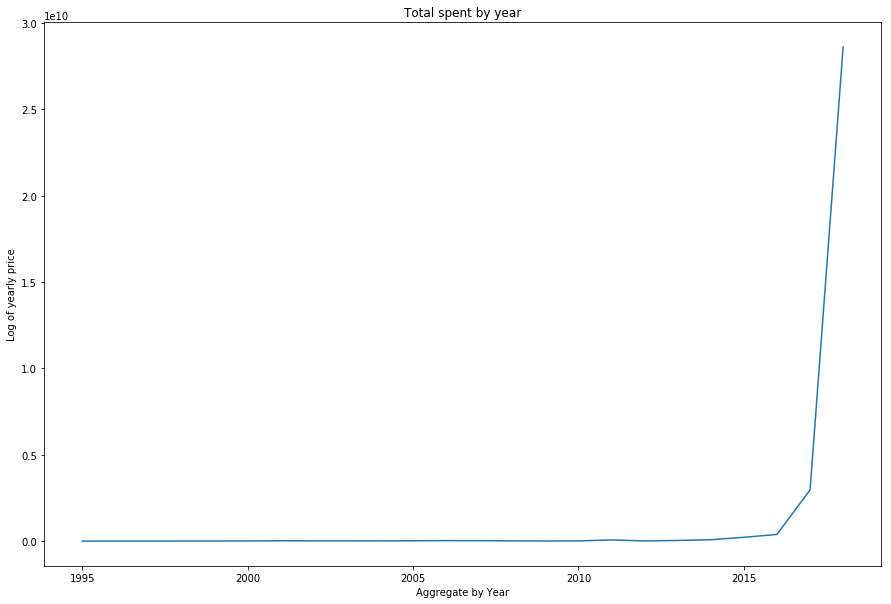

In [12]:
# Graph the above
plt.figure(figsize=(15,10))
plt.plot((transfer_by_yr['price']['sum']))
plt.xlabel('Aggregate by Year')
plt.ylabel('Log of yearly price')
plt.title('Total spent by year')

### Record type

In [13]:
# Number of amendments
amendments = data[data['record_status'] != 'A']
print(amendments.index.size)
amendments.head()


7429


,transaction_id,price,date_of_transfer,postcode,property_type,old_or_new,duration,paon,saon,street,locality,town_city,district,county,ppd_category,record_status
17,{B40DA8B6-F2A9-45A3-87EF-015A7838F29D},123500,2002-11-08,EX2 4TE,F,N,F,40,NaN,MAGDALEN ROAD,NaN,EXETER,EXETER,DEVON,A,C
18,{5545F464-D67F-44BE-9710-003A3CCE93FC},100000,2002-01-31,HD7 5UZ,D,N,F,BURNT PLATTS LANE,THE PIGGERY,NaN,SLAITHWAITE,HUDDERSFIELD,KIRKLEES,WEST YORKSHIRE,A,C
19,{D4D5C6D7-CEB9-4288-9DCA-FCFA0AC0463E},170000,2002-08-07,NR32 3JN,T,N,F,25,NaN,CHURCH LANE,NaN,LOWESTOFT,WAVENEY,SUFFOLK,A,C
20,{0DFD3509-8739-4F1E-A916-1688DCC99B02},85950,2002-09-13,BH7 6BT,F,N,L,664 - 666,FLAT 9,CHRISTCHURCH ROAD,NaN,BOURNEMOUTH,BOURNEMOUTH,BOURNEMOUTH,A,C
21,{80F14F85-57A3-4510-B15D-254C6BF7EFD3},55000,2002-02-28,NN11 4DU,F,N,L,20,NaN,NEWLANDS,NaN,DAVENTRY,DAVENTRY,NORTHAMPTONSHIRE,A,C


### Counties areas and zones

In [14]:
# Number of counties in the dataset
counties = data['county'].unique()
counties, len(counties)

(array(['BEDFORD', 'CENTRAL BEDFORDSHIRE', 'WEST BERKSHIRE',
        'GREATER LONDON', 'GREATER MANCHESTER', 'KENT', 'NORFOLK',
        'OXFORDSHIRE', 'WREKIN', 'SOMERSET', 'CEREDIGION', 'GWYNEDD',
        'CUMBRIA', 'DARLINGTON', 'SURREY', 'DEVON', 'WEST YORKSHIRE',
        'SUFFOLK', 'BOURNEMOUTH', 'NORTHAMPTONSHIRE', 'WARWICKSHIRE',
        'NOTTINGHAMSHIRE', 'HERTFORDSHIRE', 'RHONDDA CYNON TAFF',
        'LINCOLNSHIRE', 'DORSET', 'HAMPSHIRE', 'PORTSMOUTH', 'EAST SUSSEX',
        'CORNWALL', 'FLINTSHIRE', 'NORTH YORKSHIRE', 'GLOUCESTERSHIRE',
        'WORCESTERSHIRE', 'TORBAY', 'ESSEX', 'SOUTH YORKSHIRE',
        'WEST SUSSEX', 'CARMARTHENSHIRE', 'MERSEYSIDE',
        'BRIGHTON AND HOVE', 'WEST MIDLANDS', 'WILTSHIRE',
        'NORTHUMBERLAND', 'LEICESTER', 'STAFFORDSHIRE', 'BRIDGEND',
        'SWANSEA', 'WREXHAM', 'NEWPORT', 'SHROPSHIRE', 'CARDIFF',
        'NORTH SOMERSET', 'CAERPHILLY', 'THE VALE OF GLAMORGAN', 'MEDWAY',
        'CITY OF PLYMOUTH', 'CITY OF KINGSTON UPON HULL',
  

In [15]:
# Number of districts
districts = data['district'].unique()
districts, len(districts)

(array(['BEDFORD', 'CENTRAL BEDFORDSHIRE', 'WEST BERKSHIRE', 'HARINGEY',
        'WIGAN', 'ASHFORD', 'NORTH NORFOLK', 'CHERWELL', 'WREKIN',
        'WEST SOMERSET', 'CEREDIGION', 'GWYNEDD', 'SOUTH LAKELAND',
        'KENSINGTON AND CHELSEA', 'DARLINGTON', 'CITY OF WESTMINSTER',
        'ELMBRIDGE', 'EXETER', 'KIRKLEES', 'WAVENEY', 'BOURNEMOUTH',
        'DAVENTRY', 'WALTHAM FOREST', 'WARWICK', 'BROXTOWE', 'HACKNEY',
        'WANDSWORTH', 'ST ALBANS', 'RHONDDA CYNON TAFF', 'OLDHAM',
        'SOUTH HOLLAND', 'WEYMOUTH AND PORTLAND', 'HAVANT',
        'WEST OXFORDSHIRE', 'REDBRIDGE', 'PORTSMOUTH', 'EASTBOURNE',
        'CORNWALL', 'DOVER', 'FLINTSHIRE', 'KETTERING',
        'SOUTH NORTHAMPTONSHIRE', 'SCARBOROUGH', 'ISLINGTON', 'THANET',
        'FOREST OF DEAN', 'EALING', 'WYCHAVON', 'TORBAY', 'TENDRING',
        'DONCASTER', 'MANCHESTER', 'CHICHESTER', 'NORWICH',
        'CARMARTHENSHIRE', 'ST HELENS', 'BRIGHTON AND HOVE', 'COTSWOLD',
        'SHEFFIELD', 'BIRMINGHAM', 'MENDIP', 'ALLERDA

In [16]:
# London districts
london_districts = data.loc[data['county'] == 'GREATER LONDON', 'district'].unique().tolist()
london_districts, len(london_districts)

(['HARINGEY',
  'KENSINGTON AND CHELSEA',
  'CITY OF WESTMINSTER',
  'WALTHAM FOREST',
  'HACKNEY',
  'WANDSWORTH',
  'REDBRIDGE',
  'ISLINGTON',
  'EALING',
  'HAMMERSMITH AND FULHAM',
  'TOWER HAMLETS',
  'MERTON',
  'SOUTHWARK',
  'NEWHAM',
  'CROYDON',
  'HILLINGDON',
  'BEXLEY',
  'LEWISHAM',
  'HAVERING',
  'RICHMOND UPON THAMES',
  'HOUNSLOW',
  'KINGSTON UPON THAMES',
  'CAMDEN',
  'LAMBETH',
  'BARNET',
  'BROMLEY',
  'BRENT',
  'HARROW',
  'ENFIELD',
  'GREENWICH',
  'CITY OF LONDON',
  'BARKING AND DAGENHAM',
  'SUTTON'],
 33)

### Sales Volume in Latest Data

In [37]:
# Group by counties
yr_2018 = data[data['date_of_transfer'].dt.year == 2018].copy()
print(f"Number of properties = {len(yr_2018.index)}")
latest_counties = yr_2018[['price']].groupby(yr_2018['county']).agg(f)
latest_counties['price','avg'] = latest_counties['price', 'sum'] / latest_counties['price','count']
latest_counties.columns = [col[1] for col in latest_counties.columns]
latest_counties.sort_values(['sum'], ascending=False, inplace=True)
latest_counties

Number of properties = 80329


,sum,count,avg
county,,,
GREATER LONDON,7593624365,8656,877267.140134
WEST MIDLANDS,1628905627,3349,486385.675426
KENT,909414324,2392,380189.934783
SURREY,882170946,1551,568775.593810
ESSEX,877737510,2265,387522.079470
GREATER MANCHESTER,816249901,3838,212675.847056
HERTFORDSHIRE,744330257,1396,533187.863181
WEST YORKSHIRE,687644353,3390,202844.941888
HAMPSHIRE,671583174,1802,372687.665927


In [38]:
# Counties as percentage of UK
latest_counties['norm'] = (latest_counties['sum'] / latest_counties['sum'].sum())*100
latest_counties

,sum,count,avg,norm
county,,,,
GREATER LONDON,7593624365,8656,877267.140134,26.542254
WEST MIDLANDS,1628905627,3349,486385.675426,5.693569
KENT,909414324,2392,380189.934783,3.178707
SURREY,882170946,1551,568775.593810,3.083482
ESSEX,877737510,2265,387522.079470,3.067986
GREATER MANCHESTER,816249901,3838,212675.847056,2.853066
HERTFORDSHIRE,744330257,1396,533187.863181,2.601683
WEST YORKSHIRE,687644353,3390,202844.941888,2.403547
HAMPSHIRE,671583174,1802,372687.665927,2.347408


### Number of Houses sold for over £1Million

In [39]:
over_mill = yr_2018[yr_2018['price'] > 1000000]
over_mill_by_county = over_mill[['price']].groupby(yr_2018['county']).agg(f)
over_mill_by_county.columns = [col[1] for col in over_mill_by_county.columns]
over_mill_by_county.sort_values(['count'], ascending=False, inplace=True)
over_mill_by_county['norm'] = (over_mill_by_county['sum'] / over_mill_by_county['sum'].sum())*100
over_mill_by_county


,sum,count,norm
county,,,
GREATER LONDON,4201718896,1053,49.871833
SURREY,271951032,137,3.227892
HERTFORDSHIRE,213982573,82,2.539842
KENT,186472951,59,2.213320
ESSEX,161693873,52,1.919207
BUCKINGHAMSHIRE,137977242,51,1.637705
GREATER MANCHESTER,127123486,44,1.508878
HAMPSHIRE,91581750,42,1.087019
OXFORDSHIRE,66988084,37,0.795108


### Top 1% and 5% Average

In [40]:
county = 'GREATER LONDON'
top= 50
county_2018 = yr_2018[yr_2018['county'] == county].copy()

county_2018.sort_values('price', ascending=False, inplace=True)
county_median = county_2018['price'].median()
print(f'County median = {county_median}')
county_2018['price'].head(20)

County median = 450000.0


13047    185837186
11361    140000000
11142     92500000
87722     83874359
17941     81345000
10129     81345000
18977     60500000
19208     58000000
20109     53500000
19204     53500000
18459     50750000
17928     50600000
18988     43632089
19223     40700000
19196     31995000
10023     28645000
18966     28645000
19890     28645000
12139     28645000
11131     28645000
Name: price, dtype: int64

In [41]:
county_2018.describe()

,price
count,8.656000e+03
mean,8.772671e+05
std,3.839590e+06
min,1.000000e+02
25%,3.284500e+05
50%,4.500000e+05
75%,6.564688e+05
max,1.858372e+08


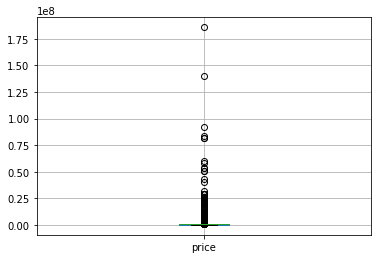

In [42]:
# Boxplot for distribution
county_2018.boxplot(column='price', grid=True)

In [43]:
num_props = len(county_2018.index)
print(f"Num props: {num_props}")
half_num = int(num_props/2)
print(f"Half the number of props = {half_num}")
mid_window = county_2018.iloc[half_num-2: half_num+2,0:2]
print(f'Middle Window: \n {mid_window}')

Num props: 8656
Half the number of props = 4328
Middle Window: 
                                transaction_id   price
83937  {6DA08449-CFB7-30F2-E053-6B04A8C05F3B}  450000
52126  {6DA0844A-2E15-30F2-E053-6B04A8C05F3B}  450000
33202  {6DA0844A-6C16-30F2-E053-6B04A8C05F3B}  450000
70070  {6DA08449-8D71-30F2-E053-6B04A8C05F3B}  450000


In [44]:
# Using numpy
top_percentile = np.percentile(county_2018['price'], top, interpolation='midpoint')
print(f'Median calculated using np.percentile {top_percentile}')


Median calculated using np.percentile 450000.0


In [45]:
# Using Pandas
top_one = county_2018.quantile(q=0.99, interpolation='midpoint')[0]
top_five = county_2018.quantile(q=0.95, interpolation='midpoint')[0]
print(f"Top 1% entrypoint = {top_one}")
print(f"Top 5% entrypoint = {top_five}")



Top 1% entrypoint = 7598500.0
Top 5% entrypoint = 1900000.0


In [46]:
top_one_mean = county_2018[county_2018['price'] > top_one].mean()[0]
top_one_median = county_2018[county_2018['price'] > top_one].median()[0]
top_five_mean = county_2018[county_2018['price'] > top_one].mean()[0]
top_five_median = county_2018[county_2018['price'] > top_one].median()[0]

print(f"Top 1% mean = {top_one_mean:,}, median = {top_one_median:,} ")
print(f"Top 5% mean = {top_five_mean:,}, median = {top_five_median:,} ")


Top 1% mean = 26,028,128.298850574, median = 16,000,000.0 
Top 5% mean = 26,028,128.298850574, median = 16,000,000.0 


In [47]:
# Refactor

def average_price_of_top_quantile(df, quantile, county=None,):
    
    if county:
        df = df.loc[df['county'] == county].copy()
    
    df.sort_values('price', ascending=False, inplace=True)
    rev_q = 1 - quantile
    top_q = df['price'].quantile(q=rev_q, interpolation='midpoint')
    print(f"{county} ({quantile}):  {top_q}")
    if isinstance(top_q, pd.Series):
        top_q = top_q[0]
        
    avg_quantile_price = df.loc[df['price'] > top_q]
    if len(avg_quantile_price.index) > 0:
        avg_quantile_price = avg_quantile_price.median()[0]
        return avg_quantile_price
    else:
        print(avg_quantile_price)
        return np.nan
    
 
    

In [48]:
kent_one_pcnt = average_price_of_top_quantile(yr_2018, 0.01, county='KENT')
print(f"County avg for first quantile = {kent_one_pcnt:,}")

KENT (0.01):  1675000.0
County avg for first quantile = 2,760,035.5


In [49]:
# Test the function
test = pd.DataFrame(data=list(range(1, 100, 1)), columns=['price'])

In [50]:
x = test['price'].quantile(q=0.5)
x

50.0

In [51]:
y = average_price_of_top_quantile(test, quantile=0.5)
y

None (0.5):  50.0


75.0

In [52]:
q_df = pd.DataFrame(columns=['County', 'Top_One', 'Top_Five'])

for c in counties:
    avg_one_pcnt = average_price_of_top_quantile(df=yr_2018, quantile=0.01, county=c)
    avg_five_pcnt = average_price_of_top_quantile(df=yr_2018, quantile=0.05, county=c)
    
    county_results = {'County': c, 
                      'Top_One': avg_one_pcnt,
                      'Top_Five': avg_five_pcnt}
    q_df = q_df.append(county_results, ignore_index=True)
    
q_df   

BEDFORD (0.01):  1193500.0
BEDFORD (0.05):  577500.0
CENTRAL BEDFORDSHIRE (0.01):  860000.0
CENTRAL BEDFORDSHIRE (0.05):  555000.0
WEST BERKSHIRE (0.01):  1625000.0
WEST BERKSHIRE (0.05):  866500.0
GREATER LONDON (0.01):  7598500.0
GREATER LONDON (0.05):  1900000.0
GREATER MANCHESTER (0.01):  1125000.0
GREATER MANCHESTER (0.05):  443725.5


/Users/eric/e-prop/et/venv/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1018: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


KENT (0.01):  1675000.0
KENT (0.05):  700000.0
NORFOLK (0.01):  817500.0
NORFOLK (0.05):  481247.5
OXFORDSHIRE (0.01):  1485000.0
OXFORDSHIRE (0.05):  936500.0
WREKIN (0.01):  1675000.0
WREKIN (0.05):  370000.0
SOMERSET (0.01):  1112500.0
SOMERSET (0.05):  562000.0
CEREDIGION (0.01):  469250.0
CEREDIGION (0.05):  376225.0
GWYNEDD (0.01):  498126.0
GWYNEDD (0.05):  337500.0
CUMBRIA (0.01):  819250.0
CUMBRIA (0.05):  473997.5
DARLINGTON (0.01):  575000.0
DARLINGTON (0.05):  365000.0
SURREY (0.01):  3050000.0
SURREY (0.05):  1250000.0
DEVON (0.01):  1209975.0
DEVON (0.05):  625000.0
WEST YORKSHIRE (0.01):  670500.0
WEST YORKSHIRE (0.05):  390000.0
SUFFOLK (0.01):  902500.0
SUFFOLK (0.05):  573750.0
BOURNEMOUTH (0.01):  1542999.0
BOURNEMOUTH (0.05):  745000.0
NORTHAMPTONSHIRE (0.01):  965000.0
NORTHAMPTONSHIRE (0.05):  510000.0
WARWICKSHIRE (0.01):  1300000.0
WARWICKSHIRE (0.05):  676500.0
NOTTINGHAMSHIRE (0.01):  987500.0
NOTTINGHAMSHIRE (0.05):  455000.0
HERTFORDSHIRE (0.01):  2571412.0


,County,Top_One,Top_Five
0,BEDFORD,3165000.0,897500.0
1,CENTRAL BEDFORDSHIRE,975000.0,662500.0
2,WEST BERKSHIRE,1850000.0,1362500.0
3,GREATER LONDON,16000000.0,3150000.0
4,GREATER MANCHESTER,1952500.0,637500.0
5,KENT,2760035.5,1000000.0
6,NORFOLK,1160000.0,680000.0
7,OXFORDSHIRE,2900000.0,1250000.0
8,WREKIN,1700000.0,522500.0
9,SOMERSET,1375000.0,725000.0


### Group by type of property

In [53]:
yr_2018.head()

,transaction_id,price,date_of_transfer,postcode,property_type,old_or_new,duration,paon,saon,street,locality,town_city,district,county,ppd_category,record_status
4011,{6DA08449-8CA0-30F2-E053-6B04A8C05F3B},860000,2018-04-20,E9 6BA,T,N,F,76,NaN,COOPERSALE ROAD,NaN,LONDON,HACKNEY,GREATER LONDON,A,A
4012,{6DA08449-8CC5-30F2-E053-6B04A8C05F3B},238000,2018-02-23,TW7 5AJ,F,N,L,364,FLAT A,LONDON ROAD,NaN,ISLEWORTH,HOUNSLOW,GREATER LONDON,A,A
4013,{6DA08449-8CC6-30F2-E053-6B04A8C05F3B},318000,2018-04-27,TW13 4QD,T,N,F,36,NaN,CRANLEIGH ROAD,NaN,FELTHAM,HOUNSLOW,GREATER LONDON,A,A
4014,{6DA08449-8CCA-30F2-E053-6B04A8C05F3B},350000,2018-04-30,N18 1EU,T,N,F,69,NaN,PRETORIA ROAD NORTH,NaN,LONDON,ENFIELD,GREATER LONDON,A,A
4015,{6DA08449-8CCB-30F2-E053-6B04A8C05F3B},525000,2018-05-18,UB6 9QP,T,N,F,28,NaN,PEMBROKE ROAD,NaN,GREENFORD,EALING,GREATER LONDON,A,A


In [55]:
# Assign property types
property_type_code = {'D' : 'Detached',
                      'S' : 'Semi-Detached',
                      'T' : 'Terraced',
                      'F' : 'Flats_Maisonette',
                      'O' : 'Other'}

In [61]:
yr_2018['month'] = yr_2018['date_of_transfer'].dt.month
yr_2018.sort_values('month', inplace=True)
yr_2018.head()

,transaction_id,price,date_of_transfer,postcode,property_type,old_or_new,duration,paon,saon,street,locality,town_city,district,county,ppd_category,record_status,month
67399,{6DA08449-9B1C-30F2-E053-6B04A8C05F3B},260000,2018-01-10,RG2 0WZ,F,Y,L,57,FLAT 4,WOOLHAMPTON WAY,NaN,READING,READING,READING,A,A,1
24131,{6DA0844A-8DE9-30F2-E053-6B04A8C05F3B},150000,2018-01-24,BA4 6NH,S,N,F,MONTGOMERY COTTAGE,NaN,NaN,LAMYATT,SHEPTON MALLET,MENDIP,SOMERSET,A,A,1
26371,{6DA0844A-9755-30F2-E053-6B04A8C05F3B},49000,2018-01-15,LS11 9LF,T,N,F,23,NaN,RYDALL STREET,NaN,LEEDS,LEEDS,WEST YORKSHIRE,A,A,1
76484,{6DA08449-E0AE-30F2-E053-6B04A8C05F3B},136000,2018-01-19,WN2 4HP,S,N,L,8,NaN,STUART AVENUE,HINDLEY GREEN,WIGAN,WIGAN,GREATER MANCHESTER,A,A,1
76485,{6DA08449-E0AF-30F2-E053-6B04A8C05F3B},142000,2018-01-12,M14 4UU,T,N,F,135,NaN,ROSEBERY STREET,NaN,MANCHESTER,MANCHESTER,GREATER MANCHESTER,A,A,1


In [86]:
# Group by type of porperty and over the year
yr_2018_type = yr_2018.groupby(['property_type', 'month',]).agg(f)

# Flatten columns and rows
yr_2018_type.columns = [col[1] for col in yr_2018_type.columns]
yr_2018_type

sum  count
property_type month                   
D             1       261543519    643
              2       484714593   1241
              3      1169018147   3025
              4      2990173947   7588
              5      1956593666   4772
F             1       386343646   1086
              2       682627187   2009
              3       967419592   3132
              4      1677298967   5800
              5       786713929   2922
O             1       638332526    505
              2      1506588046    795
              3      1334197967    914
              4      2259175691   2154
              5      1355241152   1268
S             1       138865076    539
              2       269254434   1074
              3       726055488   3087
              4      2422329877   9867
              5      1459268564   5854
T             1       125948137    511
              2       257584924   1036
              3       763892935   3273
              4      2474948792  10701
              5      1515437599   6533

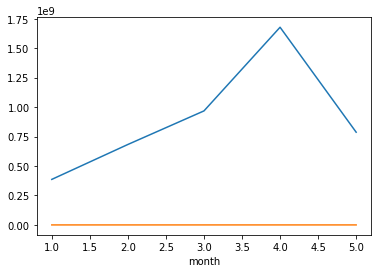

In [90]:
yr_2018_type.loc['F', 'sum'].plot()

yr_2018_type.loc['F', 'count'].plot()
